# Statistical Computing with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

# Project: Alcohol consumption of students

In this project we use a dataset containing information about Portuguese students from two public schools. This is a real world dataset that was collected in order to study alcohol consumption in young people and its effects on students' academic performance. The dataset was built from two sources: school reports and questionnaires.

We are only interested in three variables

- acl: We will create this variable from the data for storing the value of alcohol consumption levels
- G3: This variable is created for storing the final grade for the course subject
- gender: This variable is created for storing the gender of the student



In [4]:
# loading the dataset

student = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Become-a-python-data-analyst/master/data/student/student.csv",sep=";")

In [5]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
# the first variable we will create is the alcohol consumption level variable

# We will create an intermediate variable called alcohol_index which is just a weighted average of how much the student drinks 


student.rename(columns={"sex":"gender"},inplace=True)
student["alcohol_index"] = (5*student["Dalc"] + 2 *student["Walc"]) / 7

# Alcohol consumption level


student["acl"] = student["alcohol_index"] <= 2
student["acl"] = student["acl"].map({True:"Low", False:"High"})

# Confidence intervals

In [7]:
# calculate confidence intervals 

sample_size = student.shape[0]
print(sample_size)

649


In [8]:
sample_mean_grade = student["G3"].mean()
sample_mean_grade

11.906009244992296

In [9]:
std_error_grades = student["G3"].std()/sqrt(sample_size)

In [11]:
# the confidence interval
stats.norm.interval(0.95,loc=sample_mean_grade,scale=std_error_grades)

(11.65745768566587, 12.154560804318722)

In [12]:
student["acl"].value_counts(normalize=True)

Low     0.744222
High    0.255778
Name: acl, dtype: float64

In [13]:
high_prop = student["acl"].value_counts(normalize=True)["High"]
std_error_prop = sqrt(high_prop* (1-high_prop)/sample_size)

In [14]:
stats.norm.interval(0.98,loc=high_prop,scale=std_error_prop)

(0.21593666225148048, 0.2956195781183193)

In [15]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In [16]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    ax[0].bar(left=arange(n+1), height = stats.binom.pmf(k=arange(n+1),n=n,p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title("Probability Mass function")
    ax[1].plot(stats.binom.cdf(k=range(n+1),n=n,p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title("Cumulative distribution function")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


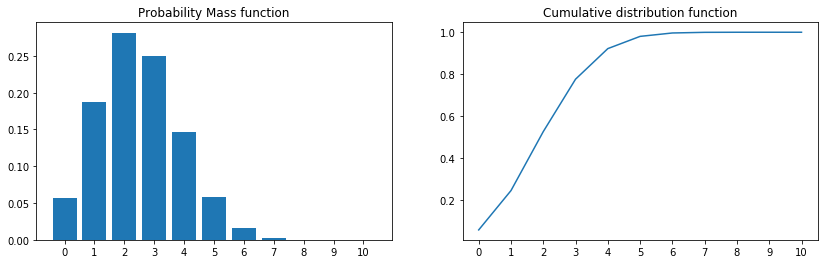

In [17]:
plot_probs_n(10)

In [19]:
# test to see if population variances equal in the two groups of students

grades_low_acl = student["G3"][student["acl"]=="Low"]
grades_high_acl = student["G3"][student["acl"]=="High"]
stats.bartlett(grades_low_acl,grades_high_acl)

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

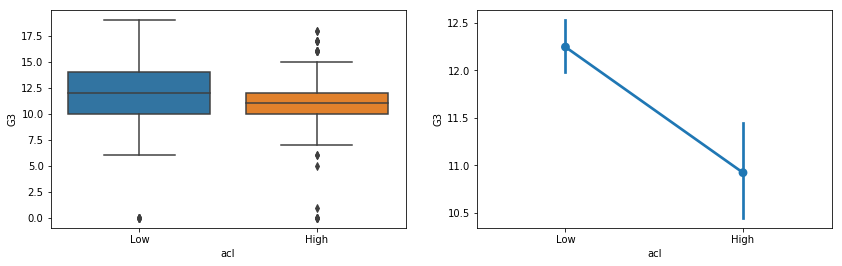

In [20]:
fig, axes = plt.subplots(1,2,figsize = (14,4))
sns.boxplot(x="acl",y="G3",data=student,ax=axes[0])
sns.pointplot(x="acl",y="G3",data=student,ax=axes[1]);

In [21]:
stats.ttest_ind(grades_low_acl,grades_high_acl,equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

# Do male students drink more than female students 

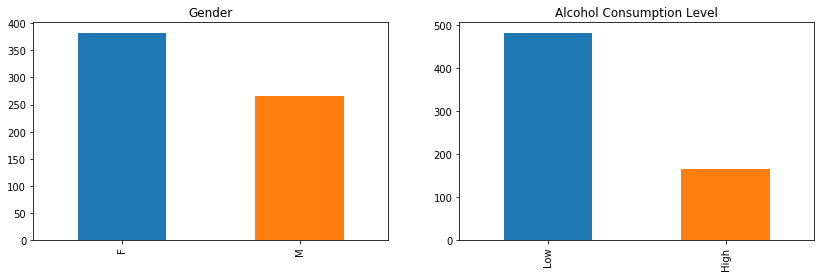

In [23]:
fig, axes = plt.subplots(1,2,figsize=(14,4))
student["gender"].value_counts().plot(kind="bar",ax=axes[0],title="Gender")
student["acl"].value_counts().plot(kind="bar",ax=axes[1],title="Alcohol Consumption Level");

In [24]:
gender_acl_table = pd.crosstab(student["acl"],student["gender"])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


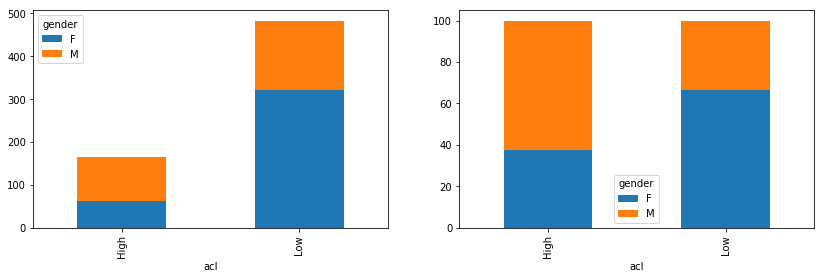

In [25]:
fig, axes = plt.subplots(1,2,figsize = (14,4))
gender_acl_table.plot(kind="bar",stacked=True,ax=axes[0]);
(100*(gender_acl_table.T/gender_acl_table.apply(sum,axis=1)).T).plot(kind="bar",stacked=True,ax=axes[1]);

In [26]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [27]:
p_value

8.72933011769437e-11

In [28]:
expected_table = pd.DataFrame(expected,index=["High","Low"],columns=["F","M"])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


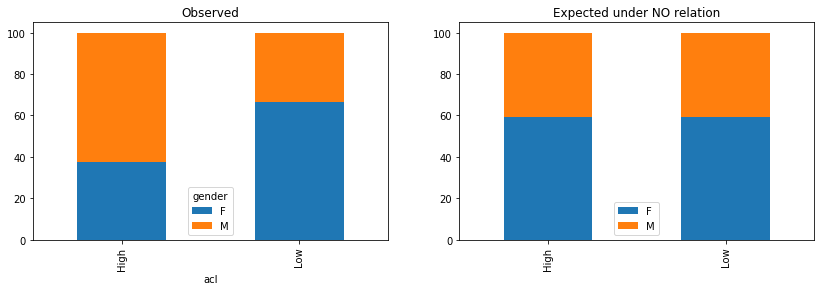

In [29]:
fig, axes = plt.subplots(1,2,figsize = (14,4))
(100*(gender_acl_table.T/gender_acl_table.apply(sum,axis=1)).T).plot(kind="bar",stacked=True,title="Observed",ax=axes[0]);
(100*(expected_table.T/expected_table.apply(sum,axis=1)).T).plot(kind="bar",stacked=True,title="Expected under NO relation",ax=axes[1]);